/tmp/ipykernel_3978307/3443466456.py:62: RuntimeWarning: Mean of empty slice
  mean_no_fb = np.nanmean(no_fb_arr, axis=0)


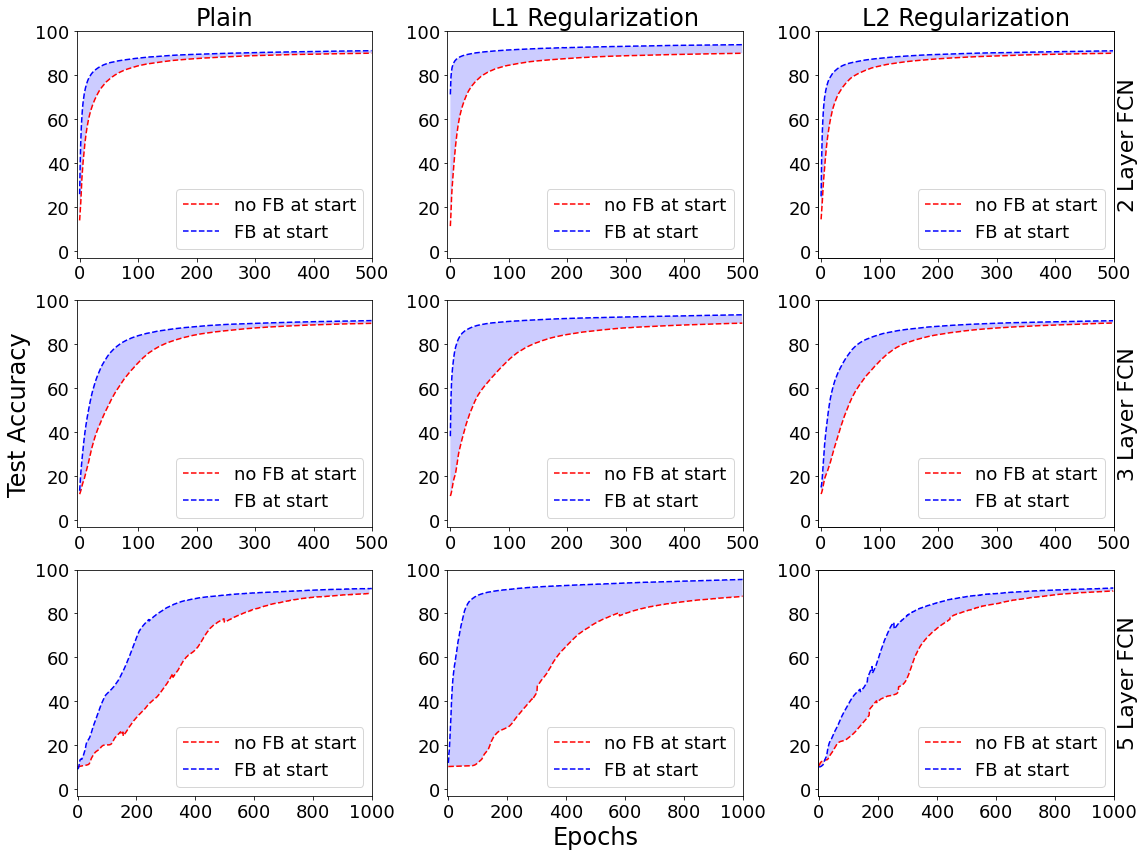

In [5]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Set constants
colors = ['red', 'blue']
sizes = ['smallFCN', 'mediumFCN', 'large_fcn']
method = ['Clean', 'L1Regularization', 'L2Regularization']
titles = ['Plain', 'L1 Regularization', 'L2 Regularization']
sizes_title = ['2 Layer FCN', '3 Layer FCN', '5 Layer FCN']
n_iterations = 5

# Create subplots
fig, axs = plt.subplots(3, 3, figsize=(16, 12), layout='tight')

# Set general titles for the plot
for col in range(3):
    axs[0][col].set_title(titles[col], fontsize=24)

# Plot data for each combination of size and method
for row, size in enumerate(sizes):
    for col, meth in enumerate(method):
        no_fb_arr = []
        fb_arr = []
        max_length = 0

        # Load data for no FB and FB
        for iteration in range(n_iterations):
            if row == 2:
                # no FB
                df_no_fb = pd.read_csv(f'../MNIST-FCN/hist/{size}/{size}-{meth}-{iteration}-fbAtStart-0.csv')
                test_acc_no_fb = df_no_fb['test_accuracy'].values
                no_fb_arr.append(test_acc_no_fb)

                # FB
                df_fb = pd.read_csv(f'../MNIST-FCN/hist/{size}/{size}-{meth}-{iteration}-fbAtStart-1.csv')
                test_acc_fb = df_fb['test_accuracy'].values
                fb_arr.append(test_acc_fb)

                max_length = max(max_length, len(test_acc_no_fb), len(test_acc_fb))
            else:
                # no FB
                with open(f'../MNIST-FCN/hist/{size}/{size}-{meth}-{iteration}-fbAtStart-0.pkl', 'rb') as f:
                    test_acc_no_fb = pickle.load(f)['test_acc']
                no_fb_arr.append(test_acc_no_fb)

                # FB
                with open(f'../MNIST-FCN/hist/{size}/{size}-{meth}-{iteration}-fbAtStart-1.pkl', 'rb') as f:
                    test_acc_fb = pickle.load(f)['test_acc']
                fb_arr.append(test_acc_fb)

                max_length = max(max_length, len(test_acc_no_fb), len(test_acc_fb))

        # Pad data for consistency
        no_fb_arr = [np.pad(a, (0, max_length - len(a)), 'constant', constant_values=np.nan) for a in no_fb_arr]
        fb_arr = [np.pad(a, (0, max_length - len(a)), 'constant', constant_values=np.nan) for a in fb_arr]

        # Calculate mean for no FB and FB
        no_fb_arr = np.array(no_fb_arr)
        fb_arr = np.array(fb_arr)
        mean_no_fb = np.nanmean(no_fb_arr, axis=0)
        mean_fb = np.nanmean(fb_arr, axis=0)
        eps = np.arange(mean_no_fb.shape[0])

        # Plot FB and no FB lines
        axs[row][col].plot(eps, mean_no_fb, 'red', linestyle='--', label='no FB at start')
        axs[row][col].plot(eps, mean_fb, 'blue', linestyle='--', label='FB at start')

        # Calculate and shade the difference
        axs[row][col].fill_between(eps, mean_no_fb, mean_fb, where=(mean_fb >= mean_no_fb), facecolor='blue', alpha=0.2, interpolate=True)
        axs[row][col].fill_between(eps, mean_no_fb, mean_fb, where=(mean_fb < mean_no_fb), facecolor='red', alpha=0.2, interpolate=True)

        # Axis labels and limits
        axs[row][col].set_xlim(-3 if row == 2 else -5, 1000 if row == 2 else 500)
        axs[row][col].set_ylim(-3, 100)
        axs[row][col].tick_params(axis='x', labelsize=18)
        axs[row][col].tick_params(axis='y', labelsize=18)
        axs[row][col].set_yticks(np.arange(0, 101, 20))
        axs[row][col].set_xticks(np.arange(0, 1001 if row == 2 else 501, 200 if row == 2 else 100))

        # Add secondary y-axis label for the last column
        if col == 2:
            taxis = axs[row][col].twinx()
            taxis.set_ylabel(sizes_title[row], fontsize=22)
            taxis.set_yticks([])

        # Legend
        axs[row][col].legend(fontsize=18, loc='lower right')

axs[1][0].set_ylabel('Test Accuracy', fontsize=24)
axs[2][1].set_xlabel('Epochs', fontsize=24)

# Add single x-axis and y-axis labels for the entire plot

# Save the figure
plt.show()


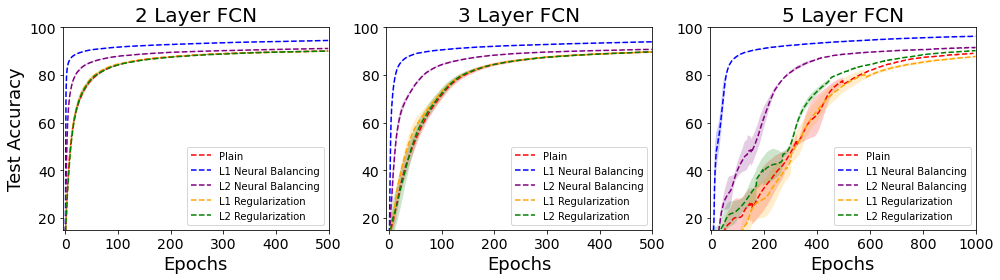

In [6]:
import matplotlib.pyplot as plt
import pickle
import numpy as np
import pandas as pd
fig, axs = plt.subplots(1, 3, figsize = (14, 4), layout='tight')
sizes = ['smallFCN', 'mediumFCN', 'large_fcn']
method = ['Clean', 'L1NB', 'L2NB', 'L1Regularization', 'L2Regularization']

colors = ['red', 'blue', 'purple', 'orange', 'green']

titles = ['Plain', 'L1 Neural Balancing', 'L2 Neural Balancing', 'L1 Regularization', 'L2 Regularization']


for row in range(3):
    if row == 2:
        for col in range(5):
            arr=[]
            arr = []
            max_length = 0
            for iteration in range(5):
                df = pd.read_csv(f'../MNIST-FCN/hist/{sizes[row]}/{sizes[row]}-{method[col]}-{iteration}-fbAtStart-{0}.csv')
                test_acc = df['test_accuracy'].values
                arr.append(test_acc)
                if len(test_acc) > max_length:
                    max_length = len(test_acc)

            arr = [np.pad(a, (0, max_length - len(a)), 'constant', constant_values=np.nan) for a in arr]
            arr = np.array(arr)
            mean = np.nanmean(arr, axis=0)
            std = np.nanstd(arr, axis=0)
            eps = np.arange(mean.shape[0])
            axs[row].plot(eps, mean, colors[col], linestyle = '--', label = titles[col])
            axs[row].fill_between(eps, mean-std, mean+std, alpha=0.2, facecolor = colors[col])
            axs[0].set_ylabel('Test Accuracy', fontsize = 18)
            axs[row].set_xlabel('Epochs', fontsize = 18)
            axs[row].set_yticks(np.arange(0, 101, 20), labelsize = 18)
            axs[row].set_xticks(np.arange(0, 1001, 200), labelsize = 18)
            axs[row].tick_params(axis='x', labelsize=14)
            axs[row].tick_params(axis='y', labelsize=14)
            axs[row].set_title('5 Layer FCN', fontsize = 20)
            axs[row].set_xlim(-5, 1000)
            axs[row].set_ylim(15, 100)
            axs[row].legend()
            if col == 0:
                axs[row].set_title(f'{method[col]} {max(mean)}', fontsize = 20)
            # axs[row].set_title(max(mean))
            # print(f'{method[col]}: {np.max(mean)}')
    else:
        for col in range(5):
            arr=[]
            for iteration in range(5):
                with open(f'../MNIST-FCN/hist/{sizes[row]}/{sizes[row]}-{method[col]}-{iteration}-fbAtStart-{0}.pkl', 'rb') as f:
                    arr.append(pickle.load(f)['test_acc'])
            arr=np.array(arr)
            mean = np.mean(arr, axis = 0)
            std = np.std(arr, axis=0)
            eps = np.arange(mean.shape[0])
            axs[row].plot(eps, mean, colors[col], linestyle = '--', label = titles[col])
            axs[row].fill_between(eps, mean-std, mean+std, alpha=0.2, facecolor = colors[col])
            axs[0].set_ylabel('Test Accuracy', fontsize = 18)
            axs[row].set_xlabel('Epochs', fontsize = 18)
            axs[row].set_yticks(np.arange(0, 101, 20), labelsize = 18)
            axs[row].set_xticks(np.arange(0, 501, 100), labelsize = 18)
            axs[row].tick_params(axis='x', labelsize=14)
            axs[row].tick_params(axis='y', labelsize=14)
            axs[row].set_xlim(-5, 500)
            axs[row].set_ylim(15, 100)
            if row == 0:
                axs[row].set_title('2 Layer FCN', fontsize = 20)
            if row == 1:
                axs[row].set_title('3 Layer FCN', fontsize = 20)
            axs[row].legend(loc = 'lower right')

            # print(f'{method[col]}: {np.max(mean)}')

plt.show()

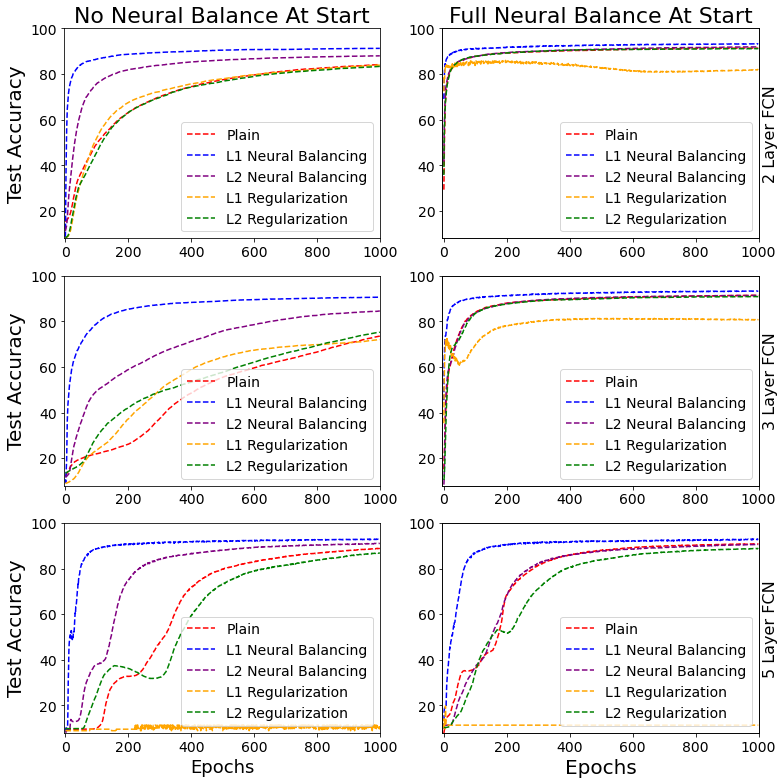

In [7]:
import pickle
import numpy as np
import torch
import matplotlib.pyplot as plt
import pandas as pd

fig, axs = plt.subplots(3, 2, figsize=(11, 11), layout='tight')

iteration = 0
fb = 0
sizesTitle = ['2 Layer FCN', '3 Layer FCN', '5 Layer FCN']
s = ['smallFCN', 'mediumFCN', 'large_fcn']
method = ['Clean', 'L1NB', 'L2NB', 'L1Regularization', 'L2Regularization']
colors = ['red', 'blue', 'purple', 'orange', 'green']
titles = ['Plain', 'L1 Neural Balancing', 'L2 Neural Balancing', 'L1 Regularization', 'L2 Regularization']

for row in range(3):
    for col in range(5):
        df = pd.read_csv(f'../MNIST-FCN/hist/{s[row]}/{s[row]}-{method[col]}-{iteration}-fbAtStart-{fb}-01.csv')
        test_acc = df['test_accuracy'].values
        eps = np.arange(len(test_acc))
        axs[row][fb].plot(eps, test_acc, colors[col], linestyle = '--', label = titles[col])
        axs[2][fb].set_xlabel('Epochs', fontsize = 18)
        axs[row][0].set_yticks(np.arange(0, 101, 20), labelsize = 18)
        axs[2][fb].set_xticks(np.arange(0, 1001, 200), labelsize = 18)
        axs[row][fb].tick_params(axis='x', labelsize=14)
        axs[row][fb].tick_params(axis='y', labelsize=14)
        axs[0][fb].set_title('No Neural Balance At Start', fontsize = 20)
        axs[row][fb].set_xlim(-5, 1000)
        axs[row][fb].set_ylim(8, 100)
        axs[row][fb].legend(fontsize=14, loc='lower right')
axs[0][0].set_ylabel('Test Accuracy', fontsize = 20)
axs[1][0].set_ylabel('Test Accuracy', fontsize = 20)
axs[2][0].set_ylabel('Test Accuracy', fontsize = 20)
fb = 1

for row in range(3):
    for col in range(5):
        df = pd.read_csv(f'../MNIST-FCN/hist/{s[row]}/{s[row]}-{method[col]}-{iteration}-fbAtStart-{fb}-01.csv')
        test_acc = df['test_accuracy'].values
        eps = np.arange(len(test_acc))
        axs[row][fb].plot(eps, test_acc, colors[col], linestyle = '--', label = titles[col])
        axs[2][fb].set_xlabel('Epochs', fontsize = 20)
        axs[row][fb].set_yticks(np.arange(0, 101, 20), labelsize = 18)
        axs[row][fb].set_xticks(np.arange(0, 1001, 200), labelsize = 18)
        axs[row][fb].tick_params(axis='x', labelsize=14)
        axs[row][fb].tick_params(axis='y', labelsize=14)
        axs[0][fb].set_title('Full Neural Balance At Start', fontsize = 20)
        axs[row][fb].set_xlim(-5, 1000)
        axs[row][fb].set_ylim(8, 100)
        axs[row][fb].legend(fontsize=14, loc='lower right')
taxis = axs[0][1].twinx()
taxis.set_ylabel('2 Layer FCN', fontsize=16)
taxis.set_yticks([])
taxis = axs[1][1].twinx()
taxis.set_ylabel('3 Layer FCN', fontsize=16)
taxis.set_yticks([])
taxis = axs[2][1].twinx()
taxis.set_ylabel('5 Layer FCN', fontsize=16)
taxis.set_yticks([])

axs[0][0].set_title('No Neural Balance At Start', fontsize = 22)
axs[0][1].set_title('Full Neural Balance At Start', fontsize = 22)

plt.show()

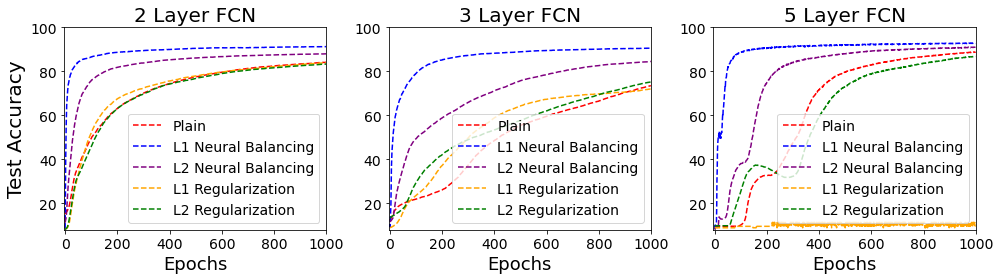

In [8]:
import pickle
import numpy as np
import torch
import matplotlib.pyplot as plt
import pandas as pd

fig, axs = plt.subplots(1, 3, figsize=(14, 4), layout='tight')

iteration = 0
fb = 0
sizesTitle = ['2 Layer FCN', '3 Layer FCN', '5 Layer FCN']
sizes = ['smallFCN', 'mediumFCN', 'large_fcn']
method = ['Clean', 'L1NB', 'L2NB', 'L1Regularization', 'L2Regularization']
colors = ['red', 'blue', 'purple', 'orange', 'green']
titles = ['Plain', 'L1 Neural Balancing', 'L2 Neural Balancing', 'L1 Regularization', 'L2 Regularization']

for row in range(3):
    for col in range(5):
        df = pd.read_csv(f'../MNIST-FCN/hist/{sizes[row]}/{sizes[row]}-{method[col]}-{iteration}-fbAtStart-{fb}-01.csv')
        test_acc = df['test_accuracy'].values
        eps = np.arange(len(test_acc))
        axs[row].plot(eps, test_acc, colors[col], linestyle = '--', label = titles[col])
        axs[row].set_xlabel('Epochs', fontsize = 18)
        axs[row].set_yticks(np.arange(0, 101, 20), labelsize = 18)
        axs[2].set_xticks(np.arange(0, 1001, 200), labelsize = 18)
        axs[row].tick_params(axis='x', labelsize=14)
        axs[row].tick_params(axis='y', labelsize=14)
        axs[row].set_title(sizesTitle[row], fontsize = 20)
        axs[row].set_xlim(-5, 1000)
        axs[row].set_ylim(8, 100)
        axs[row].legend(fontsize=14, loc='lower right')
axs[0].set_ylabel('Test Accuracy', fontsize = 20)

plt.show()


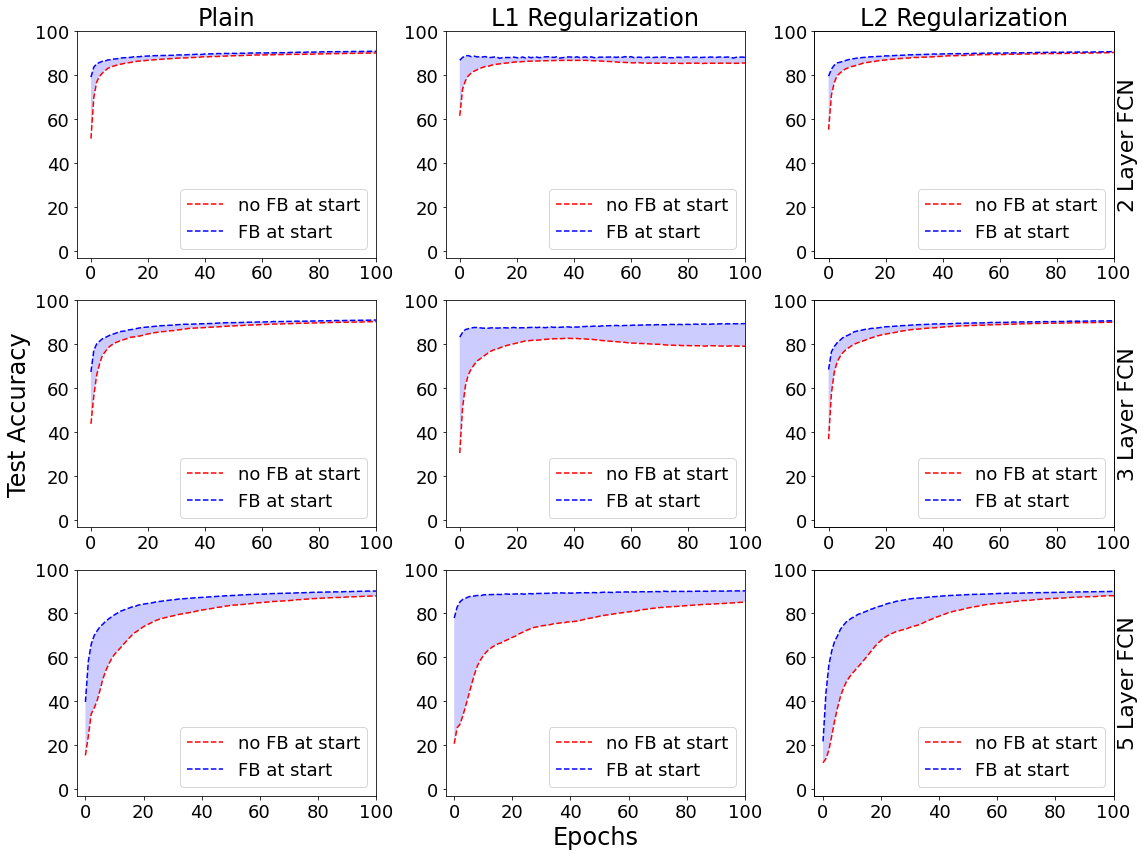

In [9]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Set constants
colors = ['red', 'blue']
sizes = ['small_fcn', 'medium_fcn', 'large_fcn']
method = ['Clean', 'L1Regularization', 'L2Regularization']
titles = ['Plain', 'L1 Regularization', 'L2 Regularization']
sizes_title = ['2 Layer FCN', '3 Layer FCN', '5 Layer FCN']
n_iterations = 1

# Create subplots
fig, axs = plt.subplots(3, 3, figsize=(16, 12), layout='tight')

# Set general titles for the plot
for col in range(3):
    axs[0][col].set_title(titles[col], fontsize=24)

# Plot data for each combination of size and method
for row, size in enumerate(sizes):
    for col, meth in enumerate(method):
        no_fb_arr = []
        fb_arr = []
        max_length = 0

        # Load data for no FB and FB
        for iteration in range(n_iterations):
            if row == 2:
                # no FB
                df_no_fb = pd.read_csv(f'../MNIST-FCN/hist/tanh_{size}/{size}-{meth}-{iteration}-fbAtStart-0.csv')
                test_acc_no_fb = df_no_fb['test_accuracy'].values
                no_fb_arr.append(test_acc_no_fb)

                # FB
                df_fb = pd.read_csv(f'../MNIST-FCN/hist/tanh_{size}/{size}-{meth}-{iteration}-fbAtStart-1.csv')
                test_acc_fb = df_fb['test_accuracy'].values
                fb_arr.append(test_acc_fb)

                max_length = max(max_length, len(test_acc_no_fb), len(test_acc_fb))
            else:
                # no FB
                df_no_fb = pd.read_csv(f'../MNIST-FCN/hist/tanh_{size}/{size}-{meth}-{iteration}-fbAtStart-0.csv')
                test_acc_no_fb = df_no_fb['test_accuracy'].values
                no_fb_arr.append(test_acc_no_fb)

                # FB
                df_fb = pd.read_csv(f'../MNIST-FCN/hist/tanh_{size}/{size}-{meth}-{iteration}-fbAtStart-1.csv')
                test_acc_fb = df_fb['test_accuracy'].values
                fb_arr.append(test_acc_fb)

                max_length = max(max_length, len(test_acc_no_fb), len(test_acc_fb))

        # Pad data for consistency
        no_fb_arr = [np.pad(a, (0, max_length - len(a)), 'constant', constant_values=np.nan) for a in no_fb_arr]
        fb_arr = [np.pad(a, (0, max_length - len(a)), 'constant', constant_values=np.nan) for a in fb_arr]

        # Calculate mean for no FB and FB
        no_fb_arr = np.array(no_fb_arr)
        fb_arr = np.array(fb_arr)
        mean_no_fb = np.nanmean(no_fb_arr, axis=0)
        mean_fb = np.nanmean(fb_arr, axis=0)
        eps = np.arange(mean_no_fb.shape[0])
        # print(f'{meth} fb: {max(mean_fb)}')
        # print(f'{meth} nofb: {max(mean_no_fb)}')
        # Plot FB and no FB lines
        axs[row][col].plot(eps, mean_no_fb, 'red', linestyle='--', label='no FB at start')
        axs[row][col].plot(eps, mean_fb, 'blue', linestyle='--', label='FB at start')

        # Calculate and shade the difference
        axs[row][col].fill_between(eps, mean_no_fb, mean_fb, where=(mean_fb >= mean_no_fb), facecolor='blue', alpha=0.2, interpolate=True)
        axs[row][col].fill_between(eps, mean_no_fb, mean_fb, where=(mean_fb < mean_no_fb), facecolor='red', alpha=0.2, interpolate=True)

        # Axis labels and limits
        axs[row][col].set_xlim(-3 if row == 2 else -5, 100 if row == 2 else 100)
        axs[row][col].set_ylim(-3, 100)
        axs[row][col].tick_params(axis='x', labelsize=18)
        axs[row][col].tick_params(axis='y', labelsize=18)
        axs[row][col].set_yticks(np.arange(0, 101, 20))
        axs[row][col].set_xticks(np.arange(0, 101 if row == 2 else 101, 20 if row == 2 else 20))

        # Add secondary y-axis label for the last column
        if col == 2:
            taxis = axs[row][col].twinx()
            taxis.set_ylabel(sizes_title[row], fontsize=22)
            taxis.set_yticks([])

        # Legend
        axs[row][col].legend(fontsize=18, loc='lower right')

axs[1][0].set_ylabel('Test Accuracy', fontsize=24)
axs[2][1].set_xlabel('Epochs', fontsize=24)

# Add single x-axis and y-axis labels for the entire plot

plt.show()
